# Stock Market Analysis

This notebook implementas a list of all freely available models to analysis live stock data and to predict to the price of a particular stock.

## This notebook consist of the following Models

* ### Traditional Analysis
 1. Fundamental Analysis
 2. Technical Analysis

* ### Machine Learning Models
 1. Linear Regression
 2. Logistic Regression
 3. Random Forest
 4. Support Vector Machine (SVM)
 5. XGBoost
 6. LightGBM

* ### Deep Learning Models
 1. Artificial Neural Networks (ANN)
 2. Recurrent Neural Networks (RNN)
 3. Long Short-Term Memory (LSTM)
 4. Gated Recurrent Units (GRU)
 5. Transformer Models

* ### Time Series Forecasting
 1. Autoregressive Conditional Heteroskedasticity(ARCH)
 2. Generalized Autoregressive Conditional Heteroskedasticity(GARCH)
 3. Autoregressive Integrated Moving Average(ARIMA)
 4. Seasonal Autoregressive Integrated Moving Average(SARIMA)
 5. Prophet model
 6. Kalman Filter

* ### Reinforcement Learning Models
 1. Deep Q-Network (DQN)
 2. Proximal Policy Optimization (PPO)
 3. A2C (Advantage Actor-Critic)
 4. Stacking (Ensemble of ML models)
 5. CNN + LSTM model

## More Models will be added in the future.

# Installing Dependencies

In [1]:
!pip install yfinance pandas numpy matplotlib seaborn statsmodels arch scikit-learn imbalanced-learn tensorflow torch alpha-vantage pykalman gym xgboost lightgbm prophet --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Importing Libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical and time series models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from arch import arch_model

# Machine Learning models and utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Deep Learning frameworks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.optimizers import Adam

# PyTorch and reinforcement learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.distributions import Categorical
from collections import deque

# Additional libraries
from alpha_vantage.fundamentaldata import FundamentalData
import time
from pykalman import KalmanFilter
import gym
import xgboost as xgb
import lightgbm as lgb
from prophet import Prophet
import random
import re

# Receive Stock Ticker from User and gather live stock data using online API

In [3]:
def get_valid_ticker():
    """Prompts user for a valid stock ticker and verifies it using Yahoo Finance."""
    while True:
        stock = input("Enter a valid stock ticker (e.g., AAPL, TSLA, MSFT): ").upper()
        try:
            test = yf.Ticker(stock)
            if test.history(period="1d").empty:
                print("Invalid ticker. Please try again.")
            else:
                return stock
        except Exception as e:
            print(f"Error validating ticker: {e}")
            print("Invalid input. Please try again.")

# Get a valid stock ticker from the user
stock_ticker = get_valid_ticker()

# Fetch stock data using Yahoo Finance
ticker = yf.Ticker(stock_ticker)
history = ticker.history(period="10y")

# Display basic stock info
try:
    info = ticker.info
    print(f"\nStock Name: {info.get('longName', 'N/A')}")
    print(f"Sector: {info.get('sector', 'N/A')}")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
except Exception as e:
    print(f"Error retrieving stock info: {e}")

Enter a valid stock ticker (e.g., AAPL, TSLA, MSFT): goog

Stock Name: Alphabet Inc.
Sector: Communication Services
Market Cap: 2075577286656


# Fundamental Analysis

In [4]:
# Fundamental Analysis
print(f"\nFundamental Analysis of {stock_ticker} :\n")
fundamentals = {}

if 'marketCap' in info:
    fundamentals["Market Cap"] = info['marketCap']
if 'trailingPE' in info:
    fundamentals["P/E Ratio"] = info['trailingPE']
if 'priceToBook' in info:
    fundamentals["P/B Ratio"] = info['priceToBook']
if 'dividendYield' in info:
    fundamentals["Dividend Yield"] = info['dividendYield']
if 'trailingEps' in info:
    fundamentals["Trailing EPS"] = info['trailingEps']
if 'forwardPE' in info:
    fundamentals["Forward P/E Ratio"] = info['forwardPE']
if 'trailingAnnualDividendYield' in info:
    fundamentals["Trailing Dividend Yield"] = info['trailingAnnualDividendYield']
if 'trailingAnnualDividendRate' in info:
    fundamentals["Trailing Dividend Rate"] = info['trailingAnnualDividendRate']
if 'beta' in info:
    fundamentals["Beta"] = info['beta']
if 'trailingPegRatio' in info:
    fundamentals["Trailing PEG Ratio"] = info['trailingPegRatio']
if 'forwardEps' in info:
    fundamentals["Forward EPS"] = info['forwardEps']

# Print fundamental data
for key, value in fundamentals.items():
    print(f"{key}: {value}")

# Buy/Sell Decision Logic
print(f"\nBuy/Sell Recommendation for {stock_ticker} :\n")

decision = "HOLD"  # Default decision

if "P/E Ratio" in fundamentals and fundamentals["P/E Ratio"] is not None:
    pe = fundamentals["P/E Ratio"]
    if pe < 15:
        decision = "BUY (Undervalued)"
    elif pe > 30:
        decision = "SELL (Overvalued)"

if "P/B Ratio" in fundamentals and fundamentals["P/B Ratio"] is not None:
    pb = fundamentals["P/B Ratio"]
    if pb < 1:
        decision = "BUY (Undervalued based on assets)"
    elif pb > 3:
        decision = "SELL (Overvalued based on assets)"

if "Beta" in fundamentals and fundamentals["Beta"] is not None:
    beta = fundamentals["Beta"]
    if beta > 1.5:
        print(f"{stock_ticker} is a high-volatility stock (Risky).")
    elif beta < 1:
        print(f"{stock_ticker} is a low-volatility stock (Stable).")

if "Dividend Yield" in fundamentals and fundamentals["Dividend Yield"] is not None:
    div_yield = fundamentals["Dividend Yield"]
    if div_yield > 0.03:
        print(f"{stock_ticker} is a good dividend-paying stock.")

print(f"\nFinal Recommendation for {stock_ticker}: {decision}\n")
fundamental_analysis = decision


Fundamental Analysis of GOOG :

Market Cap: 2075577286656
P/E Ratio: 19.445929
P/B Ratio: 6.14082
Dividend Yield: 0.48
Trailing EPS: 8.97
Forward P/E Ratio: 19.489386
Trailing Dividend Yield: 0.0058312435
Trailing Dividend Rate: 1.0
Beta: 1.014
Trailing PEG Ratio: 1.3143
Forward EPS: 8.95

Buy/Sell Recommendation for GOOG :

GOOG is a good dividend-paying stock.

Final Recommendation for GOOG: SELL (Overvalued based on assets)



# Technical Analysis


Technical Analysis :



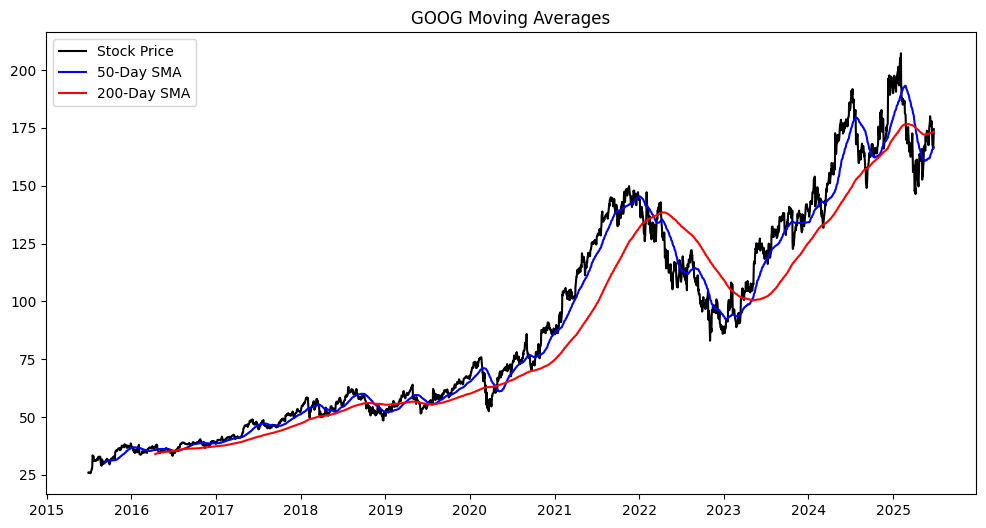


Conclusion :

Bearish Signal: GOOG is trending down based on moving averages.


In [5]:
# Technical Analysis
print("\nTechnical Analysis :\n")
history['SMA_50'] = history['Close'].rolling(window=50).mean()
history['SMA_200'] = history['Close'].rolling(window=200).mean()
history['Daily Return'] = history['Close'].pct_change()

# Plot stock price with moving averages
plt.figure(figsize=(12,6))
plt.plot(history['Close'], label='Stock Price', color='black')
plt.plot(history['SMA_50'], label='50-Day SMA', color='blue')
plt.plot(history['SMA_200'], label='200-Day SMA', color='red')
plt.title(f"{stock_ticker} Moving Averages")
plt.legend()
plt.show()

# Check for bullish or bearish trend
print("\nConclusion :\n")
if history['SMA_50'].iloc[-1] > history['SMA_200'].iloc[-1]:
    print(f"Bullish Signal: {stock_ticker} is trending up based on moving averages.")
    technical_analysis = "Buy"
else:
    print(f"Bearish Signal: {stock_ticker} is trending down based on moving averages.")
    technical_analysis = "Sell"

# Linear Regression

Linear Regression :

Model Evaluation :

Mean Absolute Error: 13.4341410414981
Mean Squared Error: 287.24610860271207
R-Squared Score: 0.8696140861526888


GOOG Price Prediction using Linear Regression :



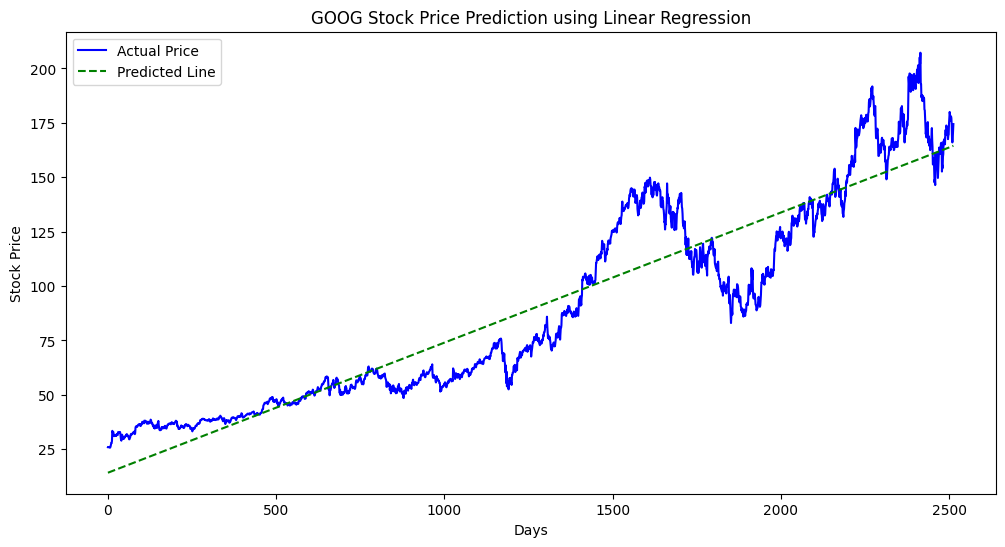


Conclusion :

Sell Signal: Predicted price (164.50) is lower than the current price (174.43).




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# Fetch data from Yahoo Finance for 10+ years
history = ticker.history(period="10y")

# Prepare data for Linear Regression
history = history.dropna()
history['Date'] = history.index
df = history[['Close']].reset_index(drop=True)
df['Day'] = np.arange(len(df))

# Split data into training and testing sets
X = df[['Day']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation
print("Linear Regression :\n")
print("Model Evaluation :\n")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}\n")

print(f"\n{stock_ticker} Price Prediction using Linear Regression :\n")
# Plot actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(df['Day'], df['Close'], label='Actual Price', color='blue')
plt.plot(df['Day'], model.predict(X), label='Predicted Line', color='green', linestyle='dashed')
plt.title(f"{stock_ticker} Stock Price Prediction using Linear Regression")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Conclusion based on prediction
latest_predicted_price = model.predict([[df['Day'].iloc[-1] + 1]])[0]
current_price = df['Close'].iloc[-1]

print("\nConclusion :\n")
if latest_predicted_price > current_price:
    print(f"Buy Signal: Predicted price ({latest_predicted_price:.2f}) is higher than the current price ({current_price:.2f}).\n\n")
    linear_regression_model = "Buy"
else:
    print(f"Sell Signal: Predicted price ({latest_predicted_price:.2f}) is lower than the current price ({current_price:.2f}).\n\n")
    linear_regression_model = "Sell"

# Logistic Regression Model

In [ ]:
#TODO

# Random Forest Regressor & Classifier

In [ ]:
#TODO

# Support Vector Machine (SVM)

In [ ]:
#TODO

# XGBoost & LightGBM

In [ ]:
#TODO

# Artificial Neural Networks (ANN)

In [ ]:
#TODO

# Recurrent Neural Networks (RNN)

In [ ]:
#TODO

# Long Short-Term Memory (LSTM)

In [ ]:
#TODO

# Gated Recurrent Units (GRU)

In [ ]:
#TODO

# Transformer Models

In [ ]:
#TODO

# ARIMA and ARCH/GARCH

In [ ]:
#TODO

# SARIMA Model

In [ ]:
#TODO

# Prophet model

In [ ]:
#TODO

# Kalman Filter

In [ ]:
#TODO

# Deep Q-Network (DQN)

In [ ]:
#TODO

# Proximal Policy Optimization (PPO)

In [ ]:
#TODO

# A2C (Advantage Actor-Critic)

In [ ]:
#TODO

# Stacking (Ensemble of ML models)

In [ ]:
#TODO

# CNN + LSTM model

In [ ]:
#TODO

# Final Output

In [ ]:
#TODO